In [ ]:
%pip install imbalanced-learn

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

Saving improved_disease_dataset.csv to improved_disease_dataset.csv


In [ ]:
# Analyzing dataset

data_df = pd.read_csv('improved_disease_dataset.csv')
data_df.head()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease
0,1,0,1,0,1,0,0,1,1,0,Paralysis (brain hemorrhage)
1,0,0,1,0,0,0,1,1,0,0,Paralysis (brain hemorrhage)
2,0,0,1,0,1,0,1,1,0,0,Paralysis (brain hemorrhage)
3,0,0,1,1,1,0,1,1,1,1,Paralysis (brain hemorrhage)
4,1,0,1,0,1,0,0,0,1,1,Paralysis (brain hemorrhage)


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   fever        2000 non-null   int64 
 1   headache     2000 non-null   int64 
 2   nausea       2000 non-null   int64 
 3   vomiting     2000 non-null   int64 
 4   fatigue      2000 non-null   int64 
 5   joint_pain   2000 non-null   int64 
 6   skin_rash    2000 non-null   int64 
 7   cough        2000 non-null   int64 
 8   weight_loss  2000 non-null   int64 
 9   yellow_eyes  2000 non-null   int64 
 10  disease      2000 non-null   object
dtypes: int64(10), object(1)
memory usage: 172.0+ KB


In [ ]:
data_df.isnull().sum()

,0
fever,0
headache,0
nausea,0
vomiting,0
fatigue,0
joint_pain,0
skin_rash,0
cough,0
weight_loss,0
yellow_eyes,0


In [ ]:
data_df.shape

(2000, 11)

array([[<Axes: title={'center': 'fever'}>,
        <Axes: title={'center': 'headache'}>,
        <Axes: title={'center': 'nausea'}>],
       [<Axes: title={'center': 'vomiting'}>,
        <Axes: title={'center': 'fatigue'}>,
        <Axes: title={'center': 'joint_pain'}>],
       [<Axes: title={'center': 'skin_rash'}>,
        <Axes: title={'center': 'cough'}>,
        <Axes: title={'center': 'weight_loss'}>],
       [<Axes: title={'center': 'yellow_eyes'}>, <Axes: >, <Axes: >]],
      dtype=object)

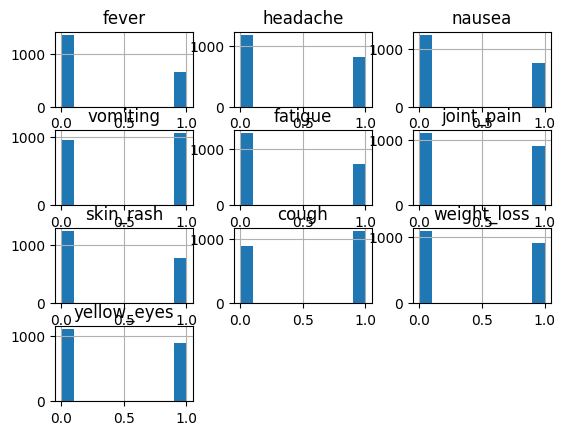

In [ ]:
data_df.hist()

In [ ]:
data_df.describe()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,0.328000,0.413000,0.378500,0.526000,0.365500,0.450500,0.387000,0.55500,0.456000,0.449000
std,0.469602,0.492496,0.485134,0.499448,0.481691,0.497668,0.487185,0.49709,0.498185,0.497517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
# Encoding categorical column 'disease' to numerical

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_df['disease'] = le.fit_transform(data_df['disease'])

In [ ]:
data_df.head()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease
0,1,0,1,0,1,0,0,1,1,0,29
1,0,0,1,0,0,0,1,1,0,0,29
2,0,0,1,0,1,0,1,1,0,0,29
3,0,0,1,1,1,0,1,1,1,1,29
4,1,0,1,0,1,0,0,0,1,1,29


In [ ]:
# Generating training and test datasets
X = data_df.drop('disease', axis = 1)
y = data_df['disease']

stsc = StandardScaler()
X_scaled = stsc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [ ]:
# Using SMOTE to handle class imbalance

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
# Using XGBoost Classifier (an advanced Gradient Boosting) since Decision Trees gave zero F1-classes
from xgboost import XGBClassifier

model = XGBClassifier(
    objective='multi:softmax',
    num_class=38,
    eval_metric='mlogloss',
    use_label_encoder=False,
)

model.fit(X_res, y_res)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:31:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.44      0.67      0.53         6
           1       0.27      0.30      0.29        10
           2       0.00      0.00      0.00         1
           3       0.40      0.22      0.29         9
           4       0.00      0.00      0.00         9
           5       0.21      0.43      0.29         7
           6       0.14      0.12      0.13         8
           7       0.46      0.35      0.40        17
           8       0.17      0.33      0.22         6
           9       0.56      0.45      0.50        11
          10       0.65      0.65      0.65        17
          11       0.42      0.62      0.50         8
          12       0.50      0.30      0.38        10
          13       0.27      0.33      0.30         9
          14       0.54      0.50      0.52        14
          15       0.33      0.22      0.27         9
          16       0.43      0.53      0.47        17
          17       0.33    

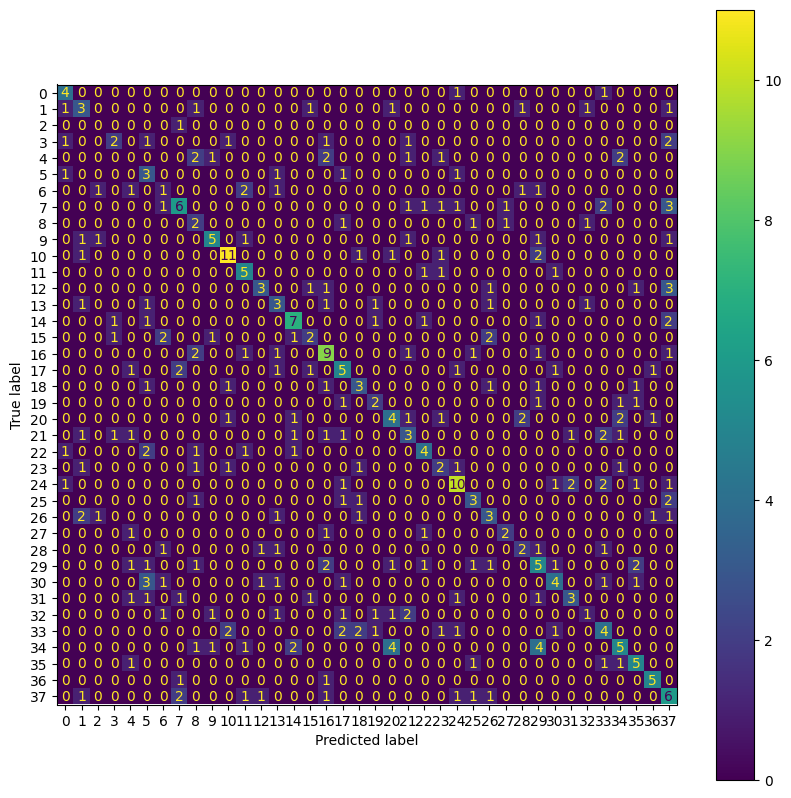

In [ ]:
# Displaying confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()

In [ ]:
import joblib

joblib.dump(model, 'disease_prediction_model.pkl')
joblib.dump(stsc, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')

from google.colab import files
files.download('disease_prediction_model.pkl')
files.download('scaler.pkl')
files.download('label_encoder.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>